# TASK-1 Prediction of Graduate Admissions

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading dataset
df = pd.read_csv('Admission_Predict.csv')

In [3]:
# Top 5 rows of dataset
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# last Five rows
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [5]:
#Total number of rows and columns
df.shape

(400, 9)

Dataset contains 9 features with 400 observations.

In [6]:
# Check columns in data
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
# Chech Statistics of data
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [8]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [9]:
#Checking null values
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [10]:
#Checking duplicates
df.duplicated().sum()

0

In [11]:
#Dropping columns 
df.drop(columns='Serial No.',inplace=True)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


# EDA

Univariate Analysis

In [12]:
df['GRE Score'].describe()

count    400.000000
mean     316.807500
std       11.473646
min      290.000000
25%      308.000000
50%      317.000000
75%      325.000000
max      340.000000
Name: GRE Score, dtype: float64

Text(0.5, 1.0, 'GRE Score')

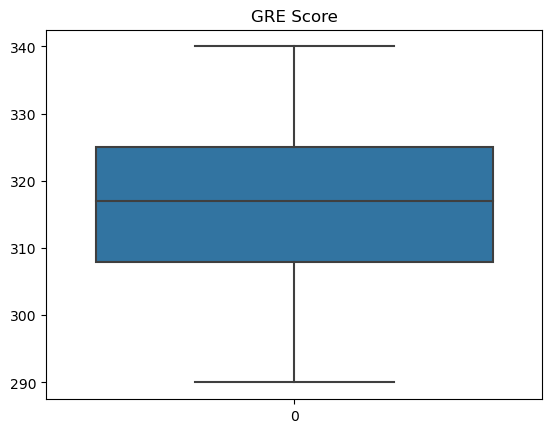

In [13]:
sns.boxplot(df['GRE Score'])
plt.title('GRE Score')

Text(0.5, 1.0, 'GRE Score')

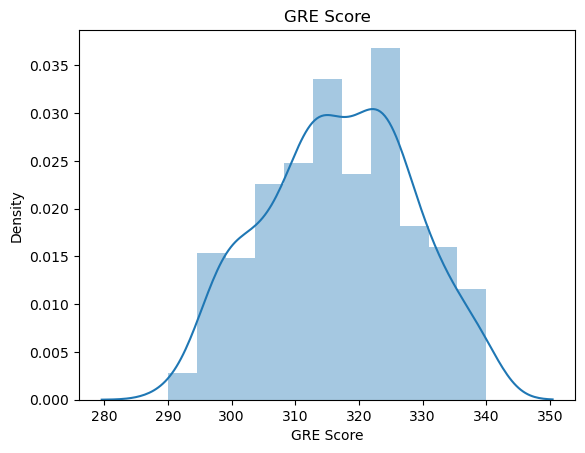

In [14]:
sns.distplot(df['GRE Score'])
plt.title('GRE Score')

In [15]:
df['TOEFL Score'].describe()

count    400.000000
mean     107.410000
std        6.069514
min       92.000000
25%      103.000000
50%      107.000000
75%      112.000000
max      120.000000
Name: TOEFL Score, dtype: float64

Text(0.5, 1.0, 'TOEFL Score')

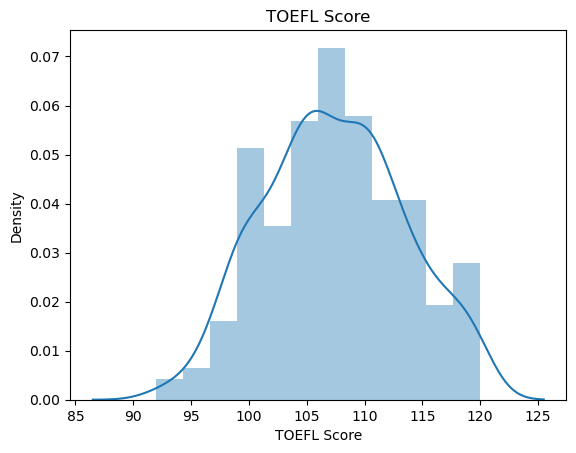

In [16]:
sns.distplot(df['TOEFL Score'])
plt.title('TOEFL Score')

Text(0.5, 1.0, 'TOEFL Score')

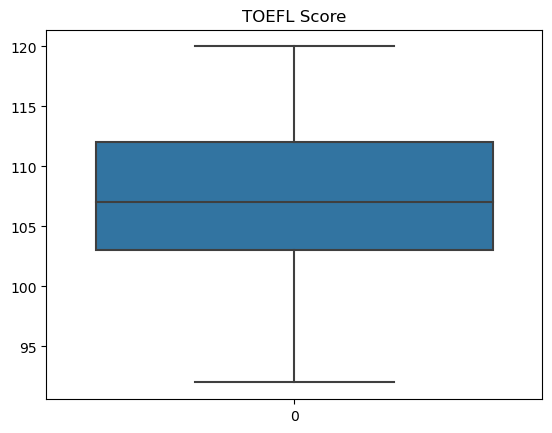

In [17]:
sns.boxplot(df['TOEFL Score'])
plt.title('TOEFL Score')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


Text(0.5, 1.0, 'University Rating(Total Count)')

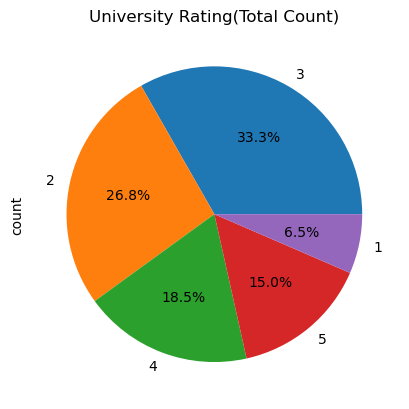

In [19]:
df['University Rating'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('University Rating(Total Count)')

<Axes: title={'center': 'Statement of Purpose'}, xlabel='SOP'>

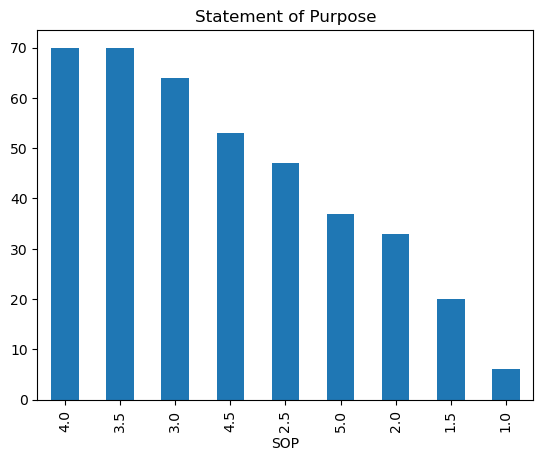

In [20]:
df.SOP.value_counts().plot(kind='bar', title='Statement of Purpose')

<Axes: title={'center': 'Letter of Recommendation'}, xlabel='LOR '>

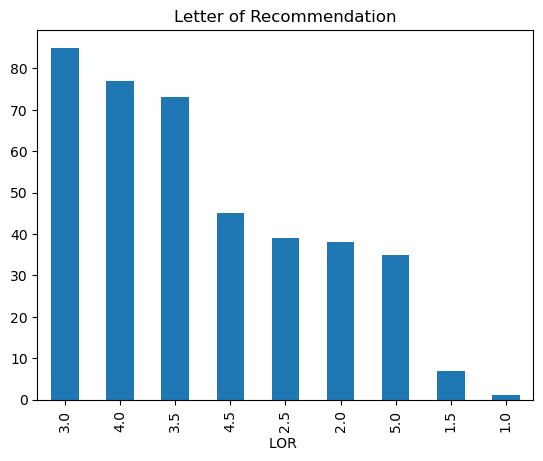

In [21]:
df['LOR '].value_counts().plot(kind='bar', title='Letter of Recommendation')

Text(0.5, 0.98, 'University Analysis of Undergraduate GPA')

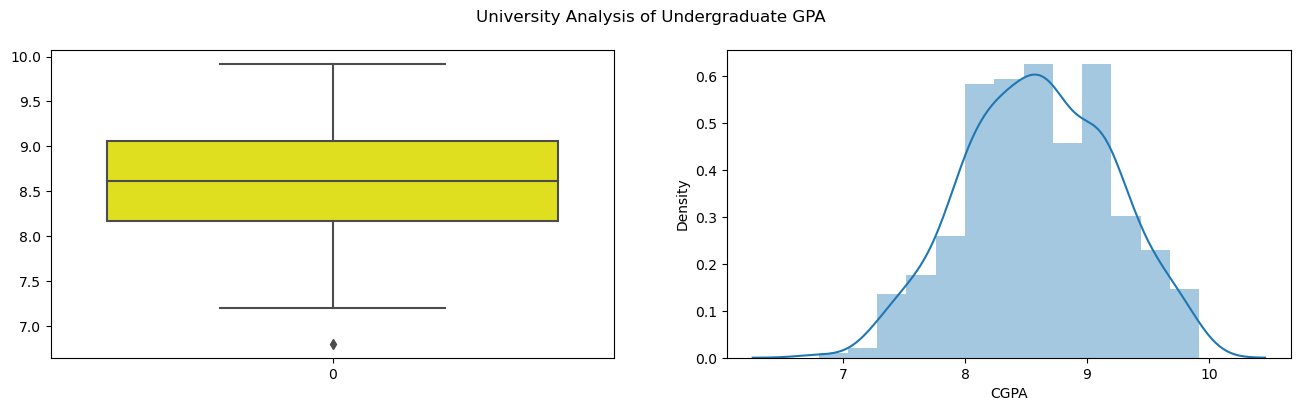

In [22]:
fig, axes = plt.subplots(1,2, figsize=(16,4))
sns.boxplot(df['CGPA'], ax = axes[0], color='yellow')
sns.distplot(df['CGPA'], ax=axes[1])
fig.suptitle('University Analysis of Undergraduate GPA')

<Axes: title={'center': 'Research Experience'}, xlabel='Research'>

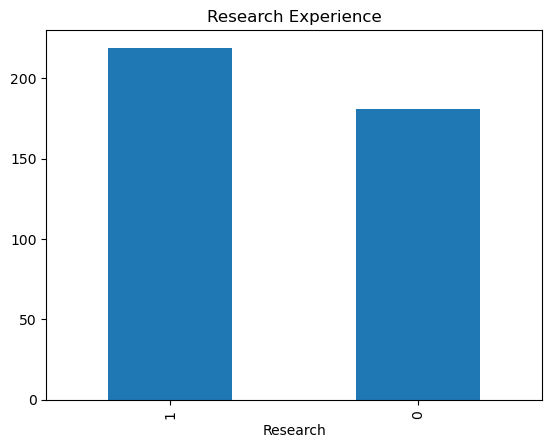

In [23]:
df.Research.value_counts().plot(kind='bar',title='Research Experience')

#1- Represent Research Experience
#0- No Research Experience

In [24]:
df['Chance of Admit '].describe()

count    400.000000
mean       0.724350
std        0.142609
min        0.340000
25%        0.640000
50%        0.730000
75%        0.830000
max        0.970000
Name: Chance of Admit , dtype: float64

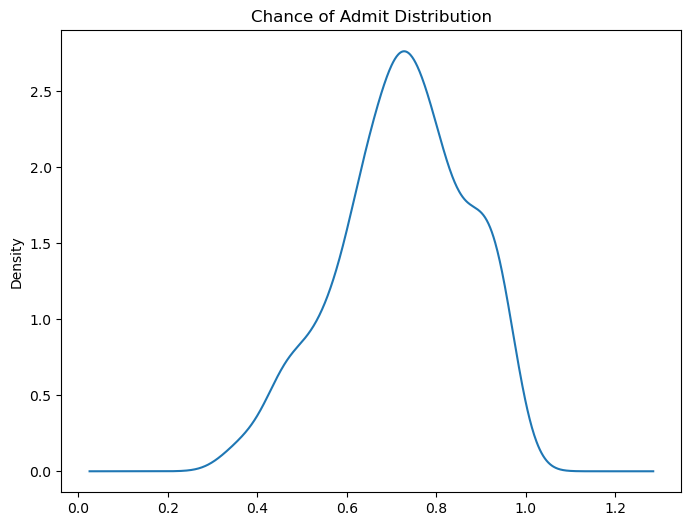

In [25]:
df['Chance of Admit '].plot(kind='kde',figsize=(8,6), title="Chance of Admit Distribution")
plt.show()

Bivariate Analysis

In [26]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


Text(0.5, 1.0, 'GRE Score VS Chance of Admit')

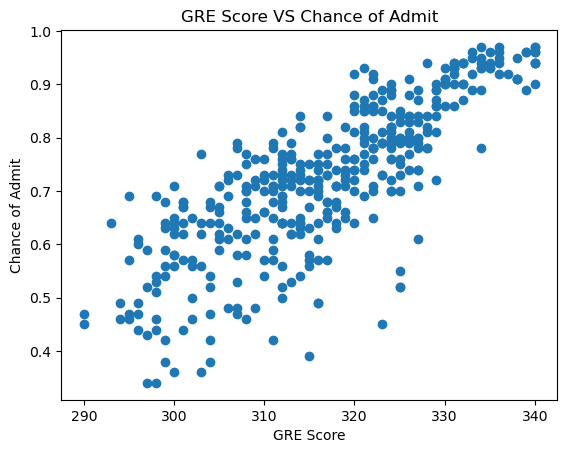

In [27]:
plt.scatter(x=df['GRE Score'], y = df['Chance of Admit '])
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.title('GRE Score VS Chance of Admit')

Text(0.5, 1.0, 'TOEFL Score VS Chance of Admit')

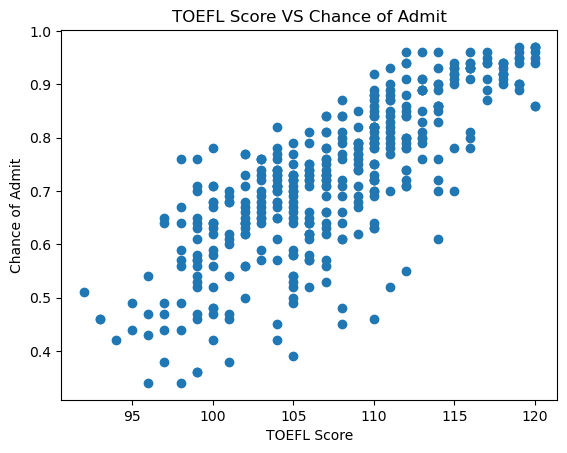

In [28]:
plt.scatter(x=df['TOEFL Score'], y = df['Chance of Admit '])
plt.xlabel('TOEFL Score')
plt.ylabel('Chance of Admit')
plt.title('TOEFL Score VS Chance of Admit')

Text(0.5, 1.0, 'CGPA VS Chance of Admit')

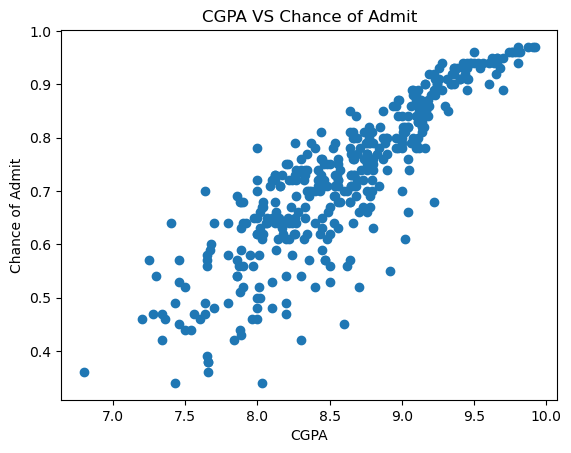

In [29]:
plt.scatter(x=df['CGPA'], y = df['Chance of Admit '])
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')
plt.title('CGPA VS Chance of Admit')

Text(0.5, 1.0, 'Research VS Chance of Admit')

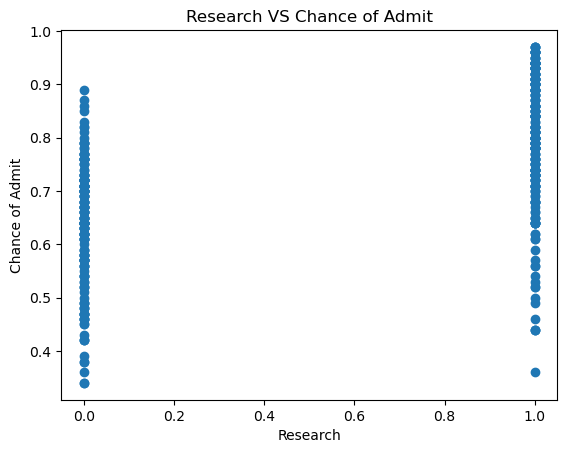

In [30]:
plt.scatter(x=df['Research'], y = df['Chance of Admit '])
plt.xlabel('Research')
plt.ylabel('Chance of Admit')
plt.title('Research VS Chance of Admit')

<Axes: >

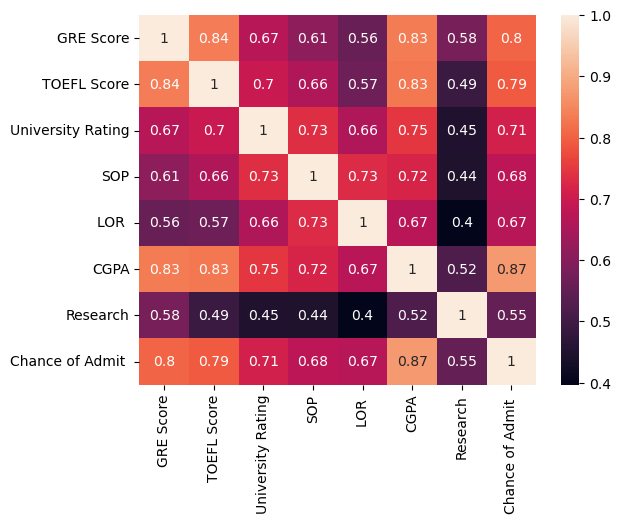

In [31]:
sns.heatmap(df.corr(), annot=True)

# MODEL DEVELOPMENT

In [32]:
X = df.iloc[:, :-1]
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [33]:
y = df.iloc[:,-1].apply(lambda y_value: 1 if y_value>= 0.8 else 0)
y.head()

0    1
1    0
2    0
3    1
4    0
Name: Chance of Admit , dtype: int64

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=45)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,mean_squared_error

In [36]:
classifiers=[['Logistic Regression :',LogisticRegression()],
            ['Decision Tree Classification :',DecisionTreeClassifier()],
            ['Random Forest Classification :',RandomForestClassifier()],
            ['Gradient Boosting Classification :',GradientBoostingClassifier()],
            ['Ada Boosting Classification :',AdaBoostClassifier()],
            ['Extra Tree Classification :',ExtraTreesClassifier()],
            ['K-Neighbors Classification :',KNeighborsClassifier()],
            ['Support Vector Classification :',SVC()]]

In [37]:
pred=[]
for name,model in classifiers:
    model=model
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    pred.append(accuracy_score(y_test,predictions))
    print(name, accuracy_score(y_test,predictions))

Logistic Regression : 0.8625
Decision Tree Classification : 0.8875
Random Forest Classification : 0.875
Gradient Boosting Classification : 0.8625
Ada Boosting Classification : 0.8625
Extra Tree Classification : 0.8625
K-Neighbors Classification : 0.8625
Support Vector Classification : 0.7375


In [38]:
y_ax=['Logistic Regression',
     'Decision Tree Classifier',
     'Random Forest Classifier',
     'Gradient Boosting classifier',
     'Ada Boosting Classifier',
     'Extra Tree Classifier',
     'K-Neighbors Classifier',
     'Support Vector Classifier']
x_ax= pred

Text(0.5, 0, 'ACCURACY')

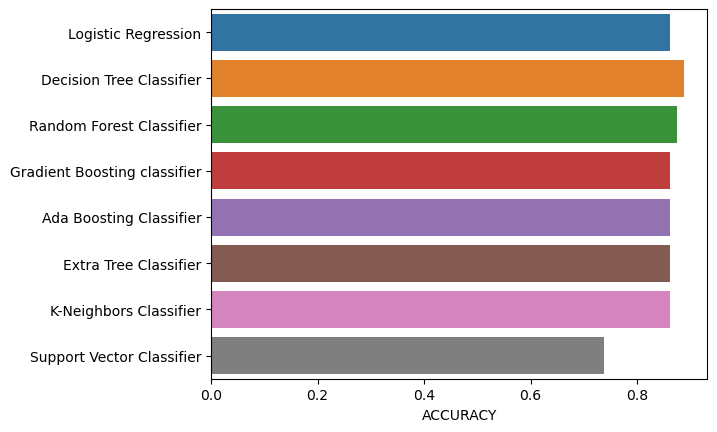

In [39]:
sns.barplot(x=x_ax,y=y_ax)
plt.xlabel('ACCURACY')

Best Model is Decision Tree Classifier : 0.93

In [40]:
data = (324,107,4,4.0,4.5,8.87,1)
array = np.asarray(data)
final = array.reshape(1,-1)
DT_classifier = DecisionTreeClassifier()
mod = DT_classifier.fit(X_train,y_train)
DT_pred = mod.predict(final)
if (DT_pred[0] == 1):
    print('Selected for Admission')
else:
    print('Not Selected for Admission')
print(DT_pred)    

Not Selected for Admission
[0]


In [41]:
data = (337,118,4,4.5,4.5,9.65,1)
array = np.asarray(data)
final = array.reshape(1,-1)
DT_clasifier= DecisionTreeClassifier()
mod = DT_classifier.fit(X_train, y_train)
DT_pred = mod.predict(final)
if (DT_pred[0] == 1):
    print('Selected for Admission')
else: 
    print('Not Selected for Admission')
    
print(DT_pred)

Selected for Admission
[1]


In [42]:
data = (314,103,2,2.0,3.0,8.21,0)
array = np.asarray(data)
final = array.reshape(1,-1)
DT_classifier= DecisionTreeClassifier()
mod = DT_classifier.fit(X_train, y_train)
DT_pred = mod.predict(final)
if (DT_pred[0] == 1):
    print('Selected for Admission')
else: 
    print('Not Selected for Admission')
    
print(DT_pred)

Not Selected for Admission
[0]
